#  Data Cleaning

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Data  

In [3]:
df = pd.read_csv("imdb.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df['sentiment'].value_counts().values

array([25000, 25000], dtype=int64)

# Review Frquency Count

In [6]:

vc_df = pd.DataFrame(df['sentiment'].value_counts()).reset_index()
vc_df.columns =['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].map({'positive': 1, 'negative': 0}) 
vc_df

,Sentiment,Count
0,1,25000
1,0,25000


## Pre-processing the data

### Some common Problems:


1.   Remove Punctuation
2.   Replace short words
3.   Making text lower case
4.   Remove stopwords
5.   Lemmatization



# Removing punctuation (.!<>{}’,”(/)-\)

In [7]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [8]:
# Replacing punctuations with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
df = df[['review','review_processed','sentiment']]

In [9]:
df['review_processed']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review_processed, Length: 50000, dtype: object

#### Replacing short words

In [10]:
'@'.join(["this", "batch" , "is", "awesome"])

'this@batch@is@awesome'

In [11]:
df['review_processed'] = df['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [12]:
df['review_processed']

0        One the other reviewers has mentioned that aft...
1        wonderful little production. <br /><br />The f...
2        thought this was wonderful way spend time too ...
3        Basically there's family where little boy (Jak...
4        Petter Mattei's "Love the Time Money" visually...
                               ...                        
49995    thought this movie did down right good job. wa...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    Catholic taught parochial elementary schools n...
49998    I'm going have disagree with the previous comm...
49999    one expects the Star Trek movies high art, but...
Name: review_processed, Length: 50000, dtype: object

#### LowerCase character

In [13]:
"kousik" == "Kousik"

False

In [14]:
word = "Kousik"
word.lower()

'kousik'

In [15]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

In [16]:
df['review_processed']

0        one the other reviewers has mentioned that aft...
1        wonderful little production. <br /><br />the f...
2        thought this was wonderful way spend time too ...
3        basically there's family where little boy (jak...
4        petter mattei's "love the time money" visually...
                               ...                        
49995    thought this movie did down right good job. wa...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    catholic taught parochial elementary schools n...
49998    i'm going have disagree with the previous comm...
49999    one expects the star trek movies high art, but...
Name: review_processed, Length: 50000, dtype: object

# Tokenization

#### Remove stop words

In [17]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even','like','see','movies','get','makes','making','time','good','watch','character']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruhal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruhal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df['review_processed']

0        reviewers mentioned watching episode 'll hooke...
1        wonderful little production . < br / > < br / ...
2        thought wonderful way spend hot summer weekend...
3        basically 's family little boy ( jake ) thinks...
4        petter mattei 's `` love money '' visually stu...
                               ...                        
49995    thought right job . n't creative original firs...
49996    bad plot , bad dialogue , bad acting , idiotic...
49997    catholic taught parochial elementary schools n...
49998    'm going disagree previous comment side maltin...
49999    expects star trek high art , fans expect best ...
Name: review_processed, Length: 50000, dtype: object

#### Lemmatization

In [19]:
nltk_tagged = nltk.pos_tag(nltk.word_tokenize("This batch is awesom"))  
for i in map(lambda x: (x[0], x[1]+"eee"),nltk_tagged):
    print(i)

('This', 'DTeee')
('batch', 'NNeee')
('is', 'VBZeee')
('awesom', 'JJeee')


1) split sentence into words
2) get the detailed POS for each word
3) get shallow POS from detailed POS
4) do lemmatisation for each word
5) join all the words to form sentence 

In [20]:
df['review_processed']

0        reviewers mentioned watching episode 'll hooke...
1        wonderful little production . < br / > < br / ...
2        thought wonderful way spend hot summer weekend...
3        basically 's family little boy ( jake ) thinks...
4        petter mattei 's `` love money '' visually stu...
                               ...                        
49995    thought right job . n't creative original firs...
49996    bad plot , bad dialogue , bad acting , idiotic...
49997    catholic taught parochial elementary schools n...
49998    'm going disagree previous comment side maltin...
49999    expects star trek high art , fans expect best ...
Name: review_processed, Length: 50000, dtype: object

#### Plotting Freqent Words

In [21]:
df

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,reviewers mentioned watching episode 'll hooke...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production . < br / > < br / ...,positive
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend hot summer weekend...,positive
3,Basically there's a family where a little boy ...,basically 's family little boy ( jake ) thinks...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei 's `` love money '' visually stu...,positive
...,...,...,...
49995,I thought this movie did a down right good job...,thought right job . n't creative original firs...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","bad plot , bad dialogue , bad acting , idiotic...",negative
49997,I am a Catholic taught in parochial elementary...,catholic taught parochial elementary schools n...,negative
49998,I'm going to have to disagree with the previou...,'m going disagree previous comment side maltin...,negative


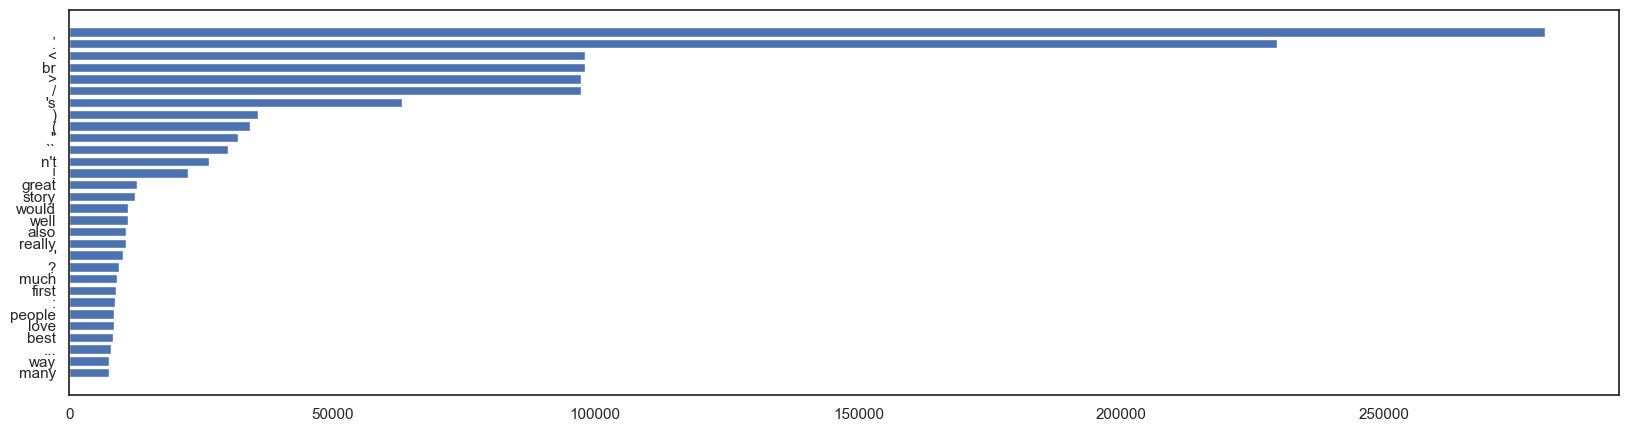

In [22]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['sentiment'] == 'positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

#### WordCloud

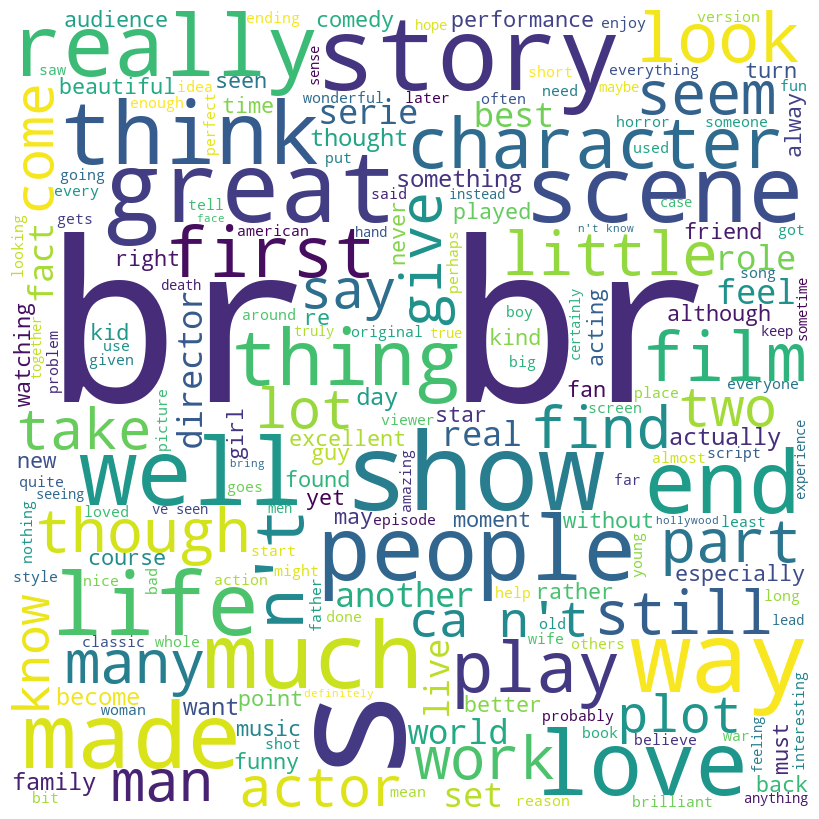

In [23]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'positive',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Bag of Words Model

In [24]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
tmp_df = tfidf.fit_transform(df.review_processed)
feature_names = tfidf.get_feature_names_out()
pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

X = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({'positive' : 1, 'negative' : 0}).values
featureNames = tfidf.get_feature_names_out()

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [25]:
X_train.shape, X_test.shape

((40000, 2500), (10000, 2500))

## Building the ML model

## Feature Importance

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[3560 1418]
 [1473 3549]]
The model accuracy is 0.7109


<Axes: >

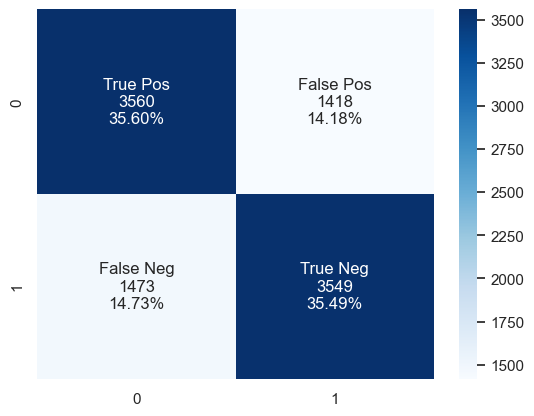

In [28]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.7109186033841615

In [30]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8658527629094899

In [31]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
104,0.084053,bad
1432,0.050004,worst
560,0.037460,great
1386,0.030077,waste
101,0.021260,awful
...,...,...
1181,0.000033,spanish
1055,0.000033,road
468,0.000033,fi
598,0.000025,hide


 # Naive bayes classification

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
x_array=df.values

In [33]:
x_train=x_array[:,1]
y_train=x_array[:,0]


In [34]:
print(x_train)

["reviewers mentioned watching episode 'll hooked . right , exactly happened me. < br / > < br / > first thing struck brutality unflinching scenes violence , set right word go . trust , show faint hearted timid . show pulls punches regards drugs , sex violence . hardcore , classic use word. < br / > < br / > called nickname given oswald maximum security state penitentary . focuses mainly emerald city , experimental section prison cells glass fronts face inwards , privacy high agenda . city home many .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffles , death stares , dodgy dealings shady agreements never far away. < br / > < br / > would say main appeal show due fact goes shows would n't dare . forget pretty pictures painted mainstream audiences , forget charm , forget romance ... oz n't mess around . first episode ever saw struck nasty surreal , could n't say ready , watched , developed taste oz , got accustomed high levels graphic violence . violenc

In [35]:
print(y_train)



["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
#fitting vectorizer on training data
vec.fit(x_train)
vec.vocabulary_

{'reviewers': 75405,
 'mentioned': 57470,
 'watching': 98102,
 'episode': 30068,
 'll': 53140,
 'hooked': 42787,
 'right': 75809,
 'exactly': 30930,
 'happened': 40384,
 'me': 56894,
 'br': 12011,
 'first': 33476,
 'thing': 90282,
 'struck': 86485,
 'brutality': 12944,
 'unflinching': 94500,
 'scenes': 78638,
 'violence': 97020,
 'set': 80204,
 'word': 99970,
 'go': 37739,
 'trust': 92844,
 'show': 81327,
 'faint': 31870,
 'hearted': 41109,
 'timid': 90862,
 'pulls': 71495,
 'punches': 71542,
 'regards': 74002,
 'drugs': 27400,
 'sex': 80300,
 'hardcore': 40446,
 'classic': 17503,
 'use': 95696,
 'called': 14070,
 'nickname': 62130,
 'given': 37420,
 'oswald': 64666,
 'maximum': 56445,
 'security': 79581,
 'state': 85446,
 'penitentary': 66976,
 'focuses': 34195,
 'mainly': 54894,
 'emerald': 29213,
 'city': 17349,
 'experimental': 31325,
 'section': 79560,
 'prison': 70508,
 'cells': 15547,
 'glass': 37496,
 'fronts': 35378,
 'face': 31749,
 'inwards': 46497,
 'privacy': 70524,
 'high

In [37]:
print(len(vec.get_feature_names_out()))

101755


In [38]:
print(vec.get_feature_names_out())

['00' '000' '00000000000' ... 'żmijewski' 'יגאל' 'כרמון']


In [39]:
vec=CountVectorizer(stop_words='english',min_df=0.03,max_df=0.8)
vec.fit(x_train)
vec.vocabulary_

{'watching': 438,
 'episode': 110,
 'll': 233,
 'right': 323,
 'exactly': 113,
 'happened': 168,
 'br': 40,
 'thing': 397,
 'scenes': 338,
 'violence': 430,
 'set': 350,
 'word': 449,
 'sex': 352,
 'classic': 64,
 'use': 421,
 'called': 46,
 'given': 152,
 'city': 63,
 'face': 120,
 'high': 178,
 'home': 184,
 'death': 85,
 'far': 126,
 'away': 22,
 'say': 334,
 'main': 245,
 'fact': 121,
 'goes': 156,
 'shows': 357,
 'pretty': 304,
 'saw': 333,
 'watched': 437,
 'got': 159,
 'kill': 207,
 'order': 280,
 'middle': 253,
 'turned': 416,
 'lack': 215,
 'experience': 117,
 'wonderful': 448,
 'little': 229,
 'production': 308,
 'old': 276,
 'time': 402,
 'gives': 153,
 'sense': 347,
 'entire': 109,
 'piece': 292,
 'actors': 7,
 'extremely': 118,
 'michael': 252,
 'truly': 412,
 'worth': 456,
 'written': 459,
 'great': 160,
 'comedy': 68,
 'life': 224,
 'really': 315,
 'comes': 69,
 'things': 398,
 'plays': 297,
 'particularly': 283,
 'sets': 351,
 'thought': 401,
 'way': 439,
 'light': 225,

In [40]:
print(vec.get_feature_names_out())
print(len(vec.get_feature_names_out()))

['10' 'able' 'absolutely' 'act' 'acting' 'action' 'actor' 'actors'
 'actress' 'actually' 'add' 'age' 'ago' 'amazing' 'american' 'annoying'
 'apparently' 'appears' 'art' 'attempt' 'attention' 'audience' 'away'
 'awful' 'bad' 'based' 'basically' 'beautiful' 'beginning' 'believe'
 'best' 'better' 'big' 'bit' 'black' 'blood' 'body' 'book' 'boring' 'boy'
 'br' 'brilliant' 'bring' 'brother' 'budget' 'ca' 'called' 'came' 'camera'
 'car' 'care' 'career' 'case' 'cast' 'certainly' 'chance' 'change'
 'characters' 'cheap' 'child' 'children' 'cinema' 'cinematography' 'city'
 'classic' 'clearly' 'close' 'come' 'comedy' 'comes' 'coming' 'complete'
 'completely' 'cool' 'country' 'couple' 'course' 'crap' 'cut' 'dark'
 'daughter' 'david' 'day' 'days' 'dead' 'death' 'decent' 'definitely'
 'despite' 'dialogue' 'different' 'directed' 'direction' 'director'
 'disappointed' 'drama' 'dvd' 'early' 'easily' 'effects' 'end' 'ending'
 'ends' 'english' 'enjoy' 'enjoyable' 'enjoyed' 'entertaining'
 'entertainment' 